In [14]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [15]:
# Create a simple 2D classification dataset
X, y = make_classification(n_samples=300, n_features=2, 
                           n_redundant=0, n_informative=2,
                           n_clusters_per_class=1, random_state=42)

df = pd.DataFrame(X, columns=["Feature1", "Feature2"])
df["Class"] = y
print(df.head())


   Feature1  Feature2  Class
0  0.733246 -1.431007      0
1  0.656043  0.842841      1
2  0.537983 -2.056550      0
3  1.289308 -0.079023      1
4  0.720124  0.977237      1


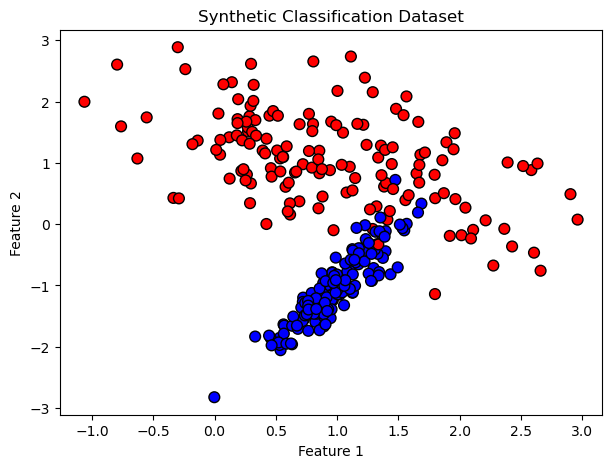

In [13]:
plt.figure(figsize=(7, 5))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap="bwr", edgecolors="k", s=60)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Synthetic Classification Dataset")
plt.show()

In [3]:
# Split into train and test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

In [4]:
# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [5]:
# --- KNN Classifier ---
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)
y_pred_knn = knn.predict(X_test_scaled)

print("KNN Accuracy:", accuracy_score(y_test, y_pred_knn))
print("KNN Classification Report:\n", classification_report(y_test, y_pred_knn))

KNN Accuracy: 0.9555555555555556
KNN Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.98      0.96        46
           1       0.98      0.93      0.95        44

    accuracy                           0.96        90
   macro avg       0.96      0.96      0.96        90
weighted avg       0.96      0.96      0.96        90



In [9]:
# --- Logistic Regression ---
log_reg = LogisticRegression()
log_reg.fit(X_train_scaled, y_train)
y_pred_log = log_reg.predict(X_test_scaled)

print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_log))
print("Logistic Regression Classification Report:\n", classification_report(y_test, y_pred_log))

Logistic Regression Accuracy: 0.9555555555555556
Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.96      0.96        46
           1       0.95      0.95      0.95        44

    accuracy                           0.96        90
   macro avg       0.96      0.96      0.96        90
weighted avg       0.96      0.96      0.96        90



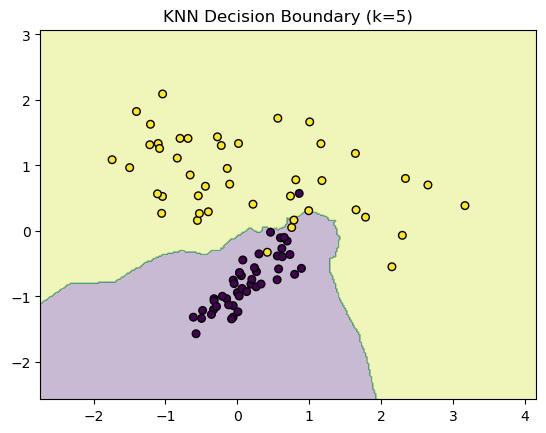

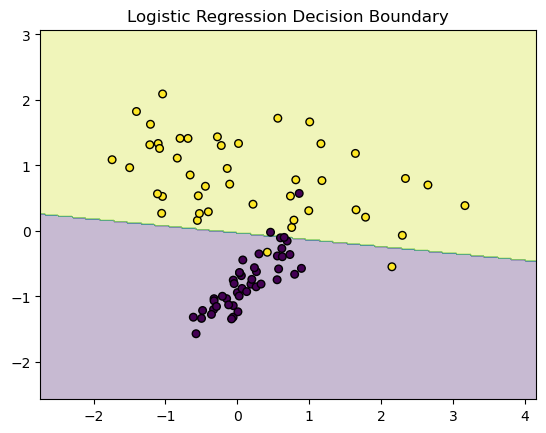

In [10]:
# --- Visualization of Decision Boundaries ---
def plot_decision_boundary(model, X, y, title):
    h = .02  # step size in the mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.3)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', s=30)
    plt.title(title)
    plt.show()

# Plot for KNN
plot_decision_boundary(knn, X_test_scaled, y_test, "KNN Decision Boundary (k=5)")

# Plot for Logistic Regression
plot_decision_boundary(log_reg, X_test_scaled, y_test, "Logistic Regression Decision Boundary")